In [1]:
import keras,os
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
import tensorflow as tf 

In [5]:
os.mkdir('C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy')
os.mkdir('C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\training_set')
os.mkdir('C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\test_set')

my_data_dir = 'C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\resized_dataset'
train_path = my_data_dir+'\\training_set\\'
directories = os.listdir(train_path)

#create folder for each class in the hog_features_numpy folder inside the train/test folder.
    
train_dir_hog='C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\training_set'
test_dir_hog='C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\test_set'

for item in directories:
    path_train=os.path.join(train_dir_hog,item)
    os.mkdir(path_train)
    
    path_test=os.path.join(test_dir_hog,item)
    os.mkdir(path_test)
    
print(os.listdir('C:\\Users\\Dear\Desktop\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy'))
print(os.listdir('C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\training_set'))
print(os.listdir('C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\test_set'))

['test_set', 'training_set']
['beaches', 'bus', 'dinosaurs', 'elephants', 'flowers', 'foods', 'horses', 'monuments', 'mountains_and_snow', 'peolpe_and_villages_in_Africa']
['beaches', 'bus', 'dinosaurs', 'elephants', 'flowers', 'foods', 'horses', 'monuments', 'mountains_and_snow', 'peolpe_and_villages_in_Africa']


In [6]:
training_path='C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features\\features_train\\'
output_path='C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\training_set\\'

for item in directories: 
    Temp = training_path + item    
    i=0
    for filename in os.listdir(Temp):
        text = np.loadtxt(os.path.join(Temp,filename))
        path=os.path.join(output_path,item)
        path=os.path.join(path,filename[:-4])
        np.save(path,text)

In [7]:
test_path='C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features\\features_test\\'
output_path='C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\test_set\\'

for item in directories: 
    Temp = test_path + item    
    i=0
    for filename in os.listdir(Temp):
        text = np.loadtxt(os.path.join(Temp,filename))
        path=os.path.join(output_path,item)
        path=os.path.join(path,filename[:-4])
        np.save(path,text)

In [3]:
traingenerator =  ImageDataGenerator()
testgenerator = ImageDataGenerator()

In [4]:
x_train = traingenerator.flow_from_directory(directory="C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\training_set",
                                                                 target_size=(14880,),
                                                                class_mode='categorical',
                                                                batch_size=16)
x_test = testgenerator.flow_from_directory(directory="C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\test_set",
                                                                target_size=(14880,),
                                                               class_mode='categorical',
                                                               batch_size=16)

Found 0 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [5]:
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense 

In [6]:
dir = 'C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\hog2_features_numpy\\'
os.listdir(dir)

['test_set', 'training_set']

In [7]:
x_train = []
y_train = []
x_test = []
y_test = []

In [8]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

In [9]:
train_path = os.path.join(dir,os.listdir(dir)[1])

for i, j in enumerate(os.listdir(train_path)):
    class_path = os.path.join(train_path,j)
    for arr in os.listdir(class_path):
        nparr=np.load(os.path.join(class_path,arr))
        x_train.append(normalize(nparr))
        y_train.append(i)

In [10]:
x_train = np.array(x_train)

In [11]:
y_train = np.array(y_train)

In [12]:
test_path = os.path.join(dir,os.listdir(dir)[0])

for i, j in enumerate(os.listdir(test_path)):
    class_path = os.path.join(test_path,j)
    for arr in os.listdir(class_path):
        nparr=np.load(os.path.join(class_path,arr))
        x_test.append(normalize(nparr))
        y_test.append(i)

In [13]:
x_test = np.array(x_test)

In [14]:
y_test = np.array(y_test)

In [15]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [16]:
from sklearn.utils import shuffle

In [17]:
x_train, y_train= shuffle(x_train, y_train, random_state=42)

In [18]:
x_test, y_test= shuffle(x_test, y_test, random_state=42)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(900, 14880)
(900, 10)
(100, 14880)
(100, 10)


# Training the neural network model

In [23]:
#define the keras model - layer by layer
kerasmodel= Sequential() #initializing model - Dense for fully connected layer
kerasmodel.add(Dense(14880, activation='relu'))
kerasmodel.add(Dropout(0.2))
kerasmodel.add(Dense(7000, activation='relu'))
kerasmodel.add(Dropout(0.3))
kerasmodel.add(Dense(1000, activation='relu'))
kerasmodel.add(Dropout(0.3))
kerasmodel.add(Dense(64, activation='relu'))
kerasmodel.add(Dropout(0.5))
kerasmodel.add(Dense(32, activation='relu'))
kerasmodel.add(Dropout(0.5))
kerasmodel.add(Dense(10, activation= 'softmax'))

In [24]:
#compiling model 
kerasmodel.compile(loss='categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])

In [25]:
#fitting model
kerasmodel.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=10, batch_size=10)

Epoch 1/10
90/90 [==============================] - 469s 4s/step - loss: 2.3024 - accuracy: 0.1040 - val_loss: 2.3018 - val_accuracy: 0.0900
Epoch 2/10
90/90 [==============================] - 264s 3s/step - loss: 2.3019 - accuracy: 0.0953 - val_loss: 2.3002 - val_accuracy: 0.1400
Epoch 3/10
90/90 [==============================] - 262s 3s/step - loss: 2.3019 - accuracy: 0.1142 - val_loss: 2.2998 - val_accuracy: 0.1000
Epoch 4/10
90/90 [==============================] - 260s 3s/step - loss: 2.2986 - accuracy: 0.1153 - val_loss: 2.2974 - val_accuracy: 0.1400
Epoch 5/10
90/90 [==============================] - 268s 3s/step - loss: 2.2998 - accuracy: 0.1244 - val_loss: 2.2961 - val_accuracy: 0.2000
Epoch 6/10
88/90 [============================>.] - ETA: 6s - loss: 2.2989 - accuracy: 0.0860

KeyboardInterrupt: 

In [ ]:
y_pred=kerasmodel.predict_classes(x_test)

In [ ]:
y_pred

In [120]:
testttt=np.argmax(y_test,axis=-1)
testttt

array([8, 5, 7, 4, 4, 3, 2, 8, 1, 0, 1, 3, 7, 3, 9, 0, 7, 7, 1, 3, 5, 8,
       2, 4, 6, 1, 4, 9, 0, 7, 1, 4, 8, 2, 9, 0, 6, 6, 3, 1, 4, 3, 0, 9,
       2, 1, 8, 2, 6, 1, 2, 0, 1, 3, 0, 7, 0, 6, 3, 8, 5, 9, 5, 4, 5, 6,
       4, 6, 6, 9, 7, 4, 5, 4, 9, 5, 7, 3, 9, 5, 6, 8, 3, 2, 0, 5, 2, 0,
       2, 8, 9, 7, 8, 8, 2, 6, 7, 1, 9, 5], dtype=int64)

In [121]:
y_pred_enc = tf.keras.utils.to_categorical(y_pred,10)

In [122]:

import sklearn

print(sklearn.metrics.classification_report(y_test,y_pred_enc))

              precision    recall  f1-score   support

           0       0.30      0.30      0.30        10
           1       0.50      0.90      0.64        10
           2       0.90      0.90      0.90        10
           3       0.33      0.70      0.45        10
           4       0.53      0.90      0.67        10
           5       0.00      0.00      0.00        10
           6       0.50      0.20      0.29        10
           7       0.33      0.10      0.15        10
           8       0.50      0.30      0.37        10
           9       0.30      0.30      0.30        10

   micro avg       0.46      0.46      0.46       100
   macro avg       0.42      0.46      0.41       100
weighted avg       0.42      0.46      0.41       100
 samples avg       0.46      0.46      0.46       100



In [90]:
#train accuracy
accuracy = kerasmodel.evaluate(x_train, y_train)
#print('Train Accuracy: %.2f' %(accuracy*100))

4/4 [==============================] - 0s 5ms/step - loss: 2.0378 - accuracy: 0.5100


In [62]:
from pyexpat import model

In [64]:
from sklearn.metrics import accuracy_score

In [89]:
#test accuracy 
y_pred = (kerasmodel.predict(x_test) > 0.5).astype("int32")
y_pred
accuracy_score(y_test, y_pred)

0.1

## Model 1: VGGNet 16

In [66]:
model1 = Sequential()
model1.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [7]:
model1.add(Flatten())
model1.add(Dense(units=4096,activation="relu"))
model1.add(Dense(units=4096,activation="relu"))
model1.add(Dense(units=10, activation="softmax"))

In [8]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [9]:
input_shape = (None, 32, 32, 3)

In [10]:
model1.build(input_shape)

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model1.fit_generator(x_train,y_train, validation_data=(x_test,y_test), validation_steps=4,epochs=10,callbacks=[early])

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
29/29 [==============================] - 31s 1s/step - loss: 9.7596 - accuracy: 0.0967 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
29/29 [==============================] - 30s 1s/step - loss: 2.3039 - accuracy: 0.0811 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
29/29 [==============================] - 32s 1s/step - loss: 2.3033 - accuracy: 0.1022 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
29/29 [==============================] - 33s 1s/step - loss: 2.3032 - accuracy: 0.0900 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
29/29 [==============================] - 33s 1s/step - loss: 2.3034 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
29/29 [==============================] - 36s 1s/step - loss: 2.3030 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
29/29 [==============================] - 32s 1s/step - loss: 2.3030 - accuracy: 0.0933 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 8/10
29/29 [==

<Figure size 432x288 with 0 Axes>

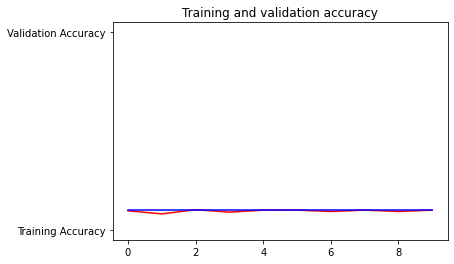

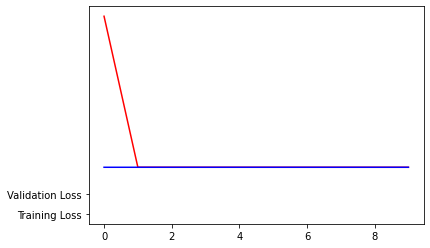

<Figure size 432x288 with 0 Axes>

In [14]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [17]:
model1.evaluate(x_train)

29/29 [==============================] - 5s 156ms/step - loss: 2.3027 - accuracy: 0.1000


[2.3026888370513916, 0.10000000149011612]